In [2]:
from dpm.models import LinearRegression, L1Regression, RidgeRegression, LassoRegression, LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from dpm.visualize import plot_stats
import torch

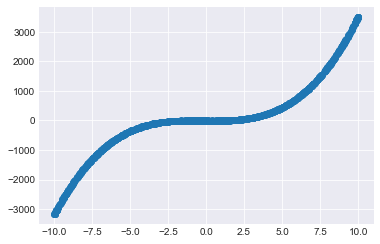

In [3]:
N = 1000

x = np.random.uniform(-10, 10, (N, 1))
x = np.concatenate((x**3, x**2, x), axis = 1)
# print(x[:, 1])
w = np.array([[3.4], [1.6], [-4.5]])
b = -4.2
y = x @ w  + b + np.random.normal(0, 4, (N, 1))
plt.scatter(x[:, 2], y); plt.show()


In [4]:
model = LassoRegression(input_dim=3, tau=10.)

In [5]:
[p.view(-1) for p in model.model.parameters()]

[tensor([-0.1799, -0.2815,  0.0814], grad_fn=<ViewBackward>),
 tensor([-0.3738], grad_fn=<ViewBackward>)]

In [6]:
torch.cat([p.view(-1) for p in model.model.parameters()])

tensor([-0.1799, -0.2815,  0.0814, -0.3738], grad_fn=<CatBackward>)

In [7]:
stats = model.fit(x, y, epochs=1000, lr=0.1, batch_size=1024)

In [8]:
[p.view(-1) for p in model.model.parameters()]

[tensor([3.3339, 1.5784, 0.2281], grad_fn=<ViewBackward>),
 tensor([-2.7771], grad_fn=<ViewBackward>)]

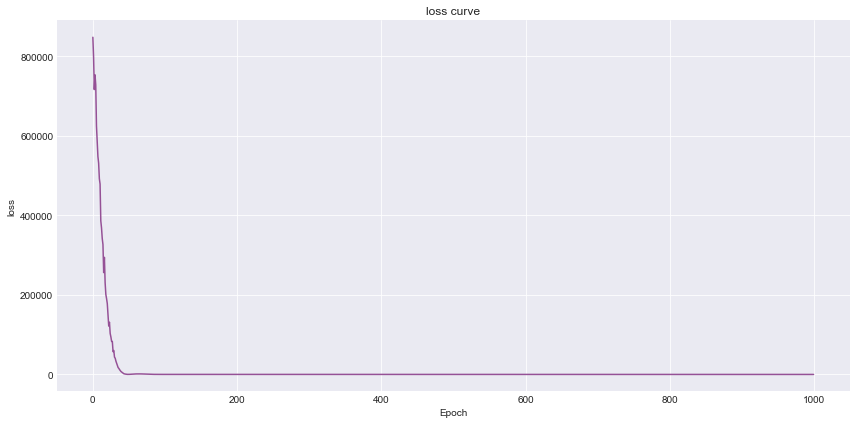

In [9]:
plot_stats(stats)

In [10]:
[p for p in model.model.parameters()]
torch.cat([p.view(-1) for p in model.model.parameters()], dim=0).view(-1, 1)

tensor([[ 3.3339],
        [ 1.5784],
        [ 0.2281],
        [-2.7771]], grad_fn=<ViewBackward>)

In [11]:
model.predict(torch.tensor(x).float()).detach().numpy()

array([[-4.10196625e+02],
       [ 3.96463684e+02],
       [-4.89248390e+01],
       [-3.62262695e+02],
       [-1.16016197e+01],
       [-8.65247498e+02],
       [ 2.03642700e+03],
       [-3.43180752e+00],
       [-2.94190383e+00],
       [-5.56514740e+00],
       [-1.74241623e+02],
       [ 1.05525659e+03],
       [-2.91703176e+00],
       [-4.88929230e+02],
       [ 3.48653027e+03],
       [-2.11926123e+03],
       [-2.95749115e+02],
       [-1.47871631e+03],
       [-1.66298364e+03],
       [-2.26520996e+03],
       [ 6.65100586e+02],
       [-1.39873413e+03],
       [-1.77347794e+01],
       [ 3.48434058e+03],
       [ 1.60939598e+01],
       [-1.36814221e+03],
       [-7.76820496e+02],
       [ 2.35601050e+03],
       [ 2.02764893e+03],
       [-5.10119110e+02],
       [ 5.50520447e+02],
       [ 1.30448364e+02],
       [ 1.35803906e+03],
       [-9.90297318e+00],
       [-6.04739197e+02],
       [ 2.12147266e+03],
       [-1.18221291e+02],
       [ 3.15532532e+02],
       [ 7.6

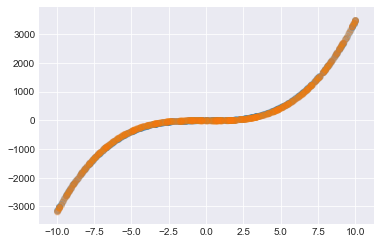

In [12]:
plt.scatter(x[:, 2], model.predict(x).detach().numpy(), alpha=0.1)
plt.scatter(x[:, 2], y, alpha=0.1)
plt.show()

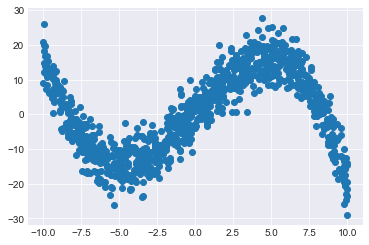

In [13]:
y_pred = model.predict(x).detach()
residual = y_pred - torch.tensor(y).float()
plt.scatter(x[:, 2], residual)

In [14]:
print(residual.mean())
print(residual.var())

tensor(0.6074)
tensor(134.0132)


In [15]:
y = torch.sigmoid(torch.tensor(y))

In [16]:
y = y.round().float()

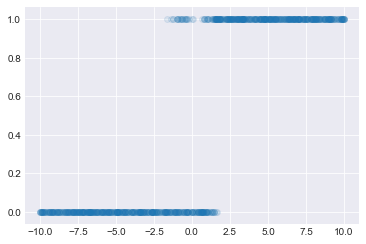

In [17]:
# plt.scatter(x[:, 2], model.sample(torch.Tensor(x)).detach(), alpha=0.1)
plt.scatter(x[:, 2], y, alpha=0.1)
plt.show()

In [18]:
model = LogisticRegression(input_dim=3)
print(x.shape)
print(y.shape)

(1000, 3)
torch.Size([1000, 1])


In [19]:
model.model.log_prob(torch.tensor(y).float(), torch.tensor(x).float())

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


tensor([[ 0.0000e+00],
        [ 0.0000e+00],
        [-1.6798e-04],
        [ 0.0000e+00],
        [-1.1208e-01],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [-6.5087e-01],
        [-6.6745e-01],
        [-9.0948e-01],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [-7.6479e-01],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [-4.0399e-02],
        [ 0.0000e+00],
        [-1.9774e-01],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [-1.1921e-07],
        [ 0.0000e+00],
        [-2.2564e-01],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [-1.0009e+00],
        [-4.4704e-05],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0.0000e+00],
        [ 0

In [1]:
model.model(torch.Tensor(x))

NameError: name 'model' is not defined

In [20]:
stats = model.fit(x, y)

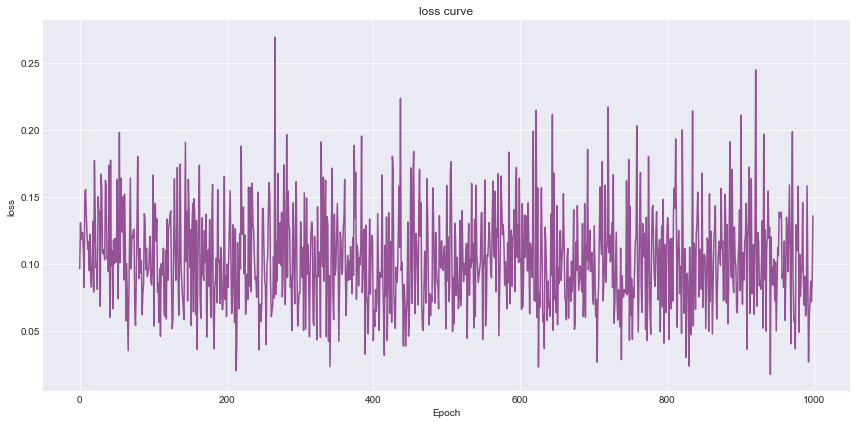

In [21]:
plot_stats(stats)

In [20]:
x

array([[  -5.46883037,    3.10405662,   -1.76183331],
       [-931.95115816,   95.41033812,   -9.76782156],
       [   1.90682338,    1.53770719,    1.24004322],
       ...,
       [   1.14224997,    1.09271634,    1.04533073],
       [ 953.40277853,   96.86887935,    9.84219891],
       [ -78.59236549,   18.34792292,   -4.28344755]])

In [21]:
x.shape
[p.view(-1) for p in model.model.parameters()]

[tensor([nan, nan, nan], grad_fn=<ViewBackward>),
 tensor([nan], grad_fn=<ViewBackward>)]

In [29]:
torch.Tensor(x)

tensor([[  -5.4688,    3.1041,   -1.7618],
        [-931.9512,   95.4103,   -9.7678],
        [   1.9068,    1.5377,    1.2400],
        ...,
        [   1.1422,    1.0927,    1.0453],
        [ 953.4028,   96.8689,    9.8422],
        [ -78.5924,   18.3479,   -4.2834]])

In [23]:
model.model(torch.Tensor(x))

[tensor([[4.1560e-39],
         [1.0000e+00],
         [4.8312e-06],
         [4.1560e-39],
         [6.7170e-02],
         [4.1560e-39],
         [1.0000e+00],
         [3.3133e-01],
         [3.1520e-01],
         [3.2353e-01],
         [1.9299e-22],
         [1.0000e+00],
         [1.9278e-01],
         [4.1560e-39],
         [1.0000e+00],
         [4.1560e-39],
         [1.1259e-38],
         [4.1560e-39],
         [4.1560e-39],
         [4.1560e-39],
         [1.0000e+00],
         [4.1560e-39],
         [1.7162e-02],
         [1.0000e+00],
         [9.3527e-01],
         [4.1560e-39],
         [4.1560e-39],
         [1.0000e+00],
         [1.0000e+00],
         [4.1560e-39],
         [1.0000e+00],
         [1.0000e+00],
         [1.0000e+00],
         [1.5510e-01],
         [4.1560e-39],
         [1.0000e+00],
         [4.0060e-15],
         [1.0000e+00],
         [5.8249e-01],
         [1.0000e+00],
         [1.0000e+00],
         [1.0000e+00],
         [4.1560e-39],
         [4

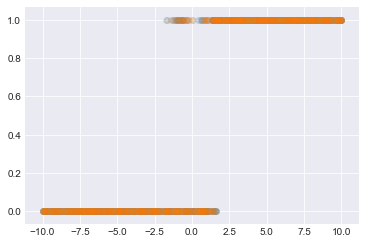

In [22]:
plt.scatter(x[:, 2], model.predict(x).detach().numpy(), alpha=0.1)
plt.scatter(x[:, 2], y, alpha=0.1)
plt.show()

In [39]:
(y == model.predict(x)).float().mean()

tensor(0.9340)

In [26]:
from torch import distributions as dists
from dpm.distributions import Bernoulli

In [27]:
p = [0.5, 0.7]
model = Bernoulli(p)
t_model = dists.Bernoulli(torch.tensor(p))

In [28]:
s = model.sample(4)

4
2


In [29]:
model.entropy(), t_model.entropy()

(tensor([0.6931, 0.6109]), tensor([0.6931, 0.6109]))

In [30]:
model.variance, t_model.variance

(tensor([0.2500, 0.2100]), tensor([0.2500, 0.2100]))

In [31]:
model.expectation, t_model.mean

(tensor([0.5000, 0.7000]), tensor([0.5000, 0.7000]))

In [36]:
model.log_prob(s)

tensor([[-0.6931, -0.3567],
        [-0.6931, -0.3567],
        [-0.6931, -1.2040],
        [-0.6931, -0.3567]])

In [37]:
t_model.log_prob(s)

tensor([[-0.6931, -0.3567],
        [-0.6931, -0.3567],
        [-0.6931, -1.2040],
        [-0.6931, -0.3567]])

In [38]:
model.probs.expand((3, model.n_dims))

tensor([[0.5000, 0.7000],
        [0.5000, 0.7000],
        [0.5000, 0.7000]])

In [39]:
model.probs.expand_as(s)

tensor([[0.5000, 0.7000],
        [0.5000, 0.7000],
        [0.5000, 0.7000],
        [0.5000, 0.7000]])

In [33]:
torch.sigmoid(x)

tensor([[0.5000, 0.7311],
        [0.7311, 0.7311],
        [0.5000, 0.7311],
        [0.5000, 0.5000]])

In [34]:
y.dtype

torch.float64